## Modelling real world problems experiments ##

In [122]:
import networkx as nx
import pandas
import matplotlib as mpt
import random
import numpy as np

In [123]:
df_kissler1 = pandas.read_csv("Kissler_DataS1.csv")
df_kissler2 = pandas.read_csv("Kissler_DataS2.csv")

#all transported to a list
r = df_kissler1.iloc[:,0].to_list() #time
r2 = df_kissler1.iloc[:,1].to_list() #person 1
r3 = df_kissler1.iloc[:,2].to_list() #person 2
r4 = df_kissler1.iloc[:,3].to_list() #meters
print(df_kissler1.head)
print(df_kissler2.head)

<bound method NDFrame.head of           1  1.1  390  17
0         1    2  215   9
1         1    2  246  18
2         1    2  265  45
3         1    5  367  32
4         1    5  430  17
...     ...  ...  ...  ..
102825  576  381  382  18
102826  576  389  449  48
102827  576  404  431   0
102828  576  426  442   1
102829  576  428  447  27

[102830 rows x 4 columns]>
<bound method NDFrame.head of        1  Thu 12 Oct 2017 07:00:00
0      2  Thu 12 Oct 2017 07:05:00
1      3  Thu 12 Oct 2017 07:10:00
2      4  Thu 12 Oct 2017 07:15:00
3      5  Thu 12 Oct 2017 07:20:00
4      6  Thu 12 Oct 2017 07:25:00
..   ...                       ...
570  572  Sat 14 Oct 2017 22:35:00
571  573  Sat 14 Oct 2017 22:40:00
572  574  Sat 14 Oct 2017 22:45:00
573  575  Sat 14 Oct 2017 22:50:00
574  576  Sat 14 Oct 2017 22:55:00

[575 rows x 2 columns]>


In [124]:
random_lst = []
while len(random_lst) != 5:
    rand = random.randint(1,469)
    if rand not in random_lst:
        random_lst.append(rand)


        
random_lst2 = []
#random vaccination list. It is possible to vaccinate someone who is sick
while len(random_lst2) != 5:
    rand2 = random.randint(1,469)
    if rand2 not in random_lst2:
        random_lst2.append(rand2)

Below the random vaccination strategy is shown. At the end 42 people were sick with a sickness transmission probability 1 since that allows for better comparison between the models. Amount of node 469. and 576 timesteps. If the persons were within 10 meters of eachother the possiblity of getting sick was there. 

In [125]:
G=nx.Graph()

#amount of nodes is 469

for i in range(1,470):
    G.add_node(i)

#nx.draw_random(G)


        
        
        
#print(random_lst)
sicknodes = random_lst
vaccinated = random_lst2
rest = []


dictio = {}
#add the state attribute the the nodes of the graph
#the first index is whether someone is sick (1), undecided (0) or vaccinated (2) , the amount of people a person has met up with.
#assumption, in one time interval only the first neighbours of a node can get infected. 
#each node is represented in this dictionary
for n in G:
    dictio[n] = [0,0]
 
    
    
    
    
for i in sicknodes:
    dictio[i][0] =+ 1
    
for i in vaccinated:
    if dictio[i][0] == 1:
        dictio[i][0] = dictio[i][0] + 1
    else:
        dictio[i][0] =+ 2
print(sicknodes)
print(vaccinated)
print(dictio)   
lst5= []
#lst 6 is the first time it goes to a new timestep
lst6= []
lstwsd = []
dummy = 0
for i in range(len(r)): #range(len(r)):
    #add the timesteps to a list
    if r[i] not in lst5:
        lst5.append(r[i])
        lst6.append(i)
    #if one of the nodes is vaccinated while meeting up, then nothing happens, because the node is basically out of the graph
    if (dictio[r2[i]][0] == 2) or (dictio[r3[i]][0] == 2):
        dummy =+ 1
    #it needs to be less than 10 meters for the sickness to go from one person to the other
    elif r4[i] <= 10:
        if dictio[r2[i]][0] == 0:
            dummy =+1 #instead of continue
        #if one of the two is sick then the other one will get sick too with a probability of 100 percent
        if (dictio[r2[i]][0] == 1):
            if (dictio[r3[i]][0] == 1):
                dummy =+1
            if (dictio[r3[i]][0] == 0):
                if np.random.rand() < 1:
                    dictio[r3[i]][0] =+ 1 
        if dictio[r3[i]][0] == 0:
            dummy =+1
        if (dictio[r3[i]][0] == 1):
            if (dictio[r2[i]][0] == 1):
                dummy =+1
            if (dictio[r3[i]][0] == 0):
                if np.random.rand() < 1:
                    dictio[r2[i]][0] =+ 1
                
        dictio[r2[i]][1] = dictio[r2[i]][1] + 1
        dictio[r3[i]][1] = dictio[r2[i]][1] + 1
        
        
        if i-1 in lst6:
            #this checks the dictionary over each timestep and gives the amount of sick people. 
            deg = 0
            sick = 0
            for k in dictio.keys():
                if dictio[k][0] == 1:
                    sick = sick + 1
                #deg = deg + dictio[k][1]
            #-5 since the vaccinated individuals are out of the graph
            #avg_deg = deg/2  / (469-5)
            if len(lstwsd) == 0:
                lstwsd.append(sick)
            else:
                #deg2 = deg/2 - lstwsd[-1][1]
                lstwsd.append(sick)
        
#with random vaccination above
#print(dictio)
#print(r3[260])
print(lst5)

print(lst6)

print(lstwsd)

[206, 282, 149, 410, 392]
[31, 114, 267, 275, 185]
{1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0], 5: [0, 0], 6: [0, 0], 7: [0, 0], 8: [0, 0], 9: [0, 0], 10: [0, 0], 11: [0, 0], 12: [0, 0], 13: [0, 0], 14: [0, 0], 15: [0, 0], 16: [0, 0], 17: [0, 0], 18: [0, 0], 19: [0, 0], 20: [0, 0], 21: [0, 0], 22: [0, 0], 23: [0, 0], 24: [0, 0], 25: [0, 0], 26: [0, 0], 27: [0, 0], 28: [0, 0], 29: [0, 0], 30: [0, 0], 31: [2, 0], 32: [0, 0], 33: [0, 0], 34: [0, 0], 35: [0, 0], 36: [0, 0], 37: [0, 0], 38: [0, 0], 39: [0, 0], 40: [0, 0], 41: [0, 0], 42: [0, 0], 43: [0, 0], 44: [0, 0], 45: [0, 0], 46: [0, 0], 47: [0, 0], 48: [0, 0], 49: [0, 0], 50: [0, 0], 51: [0, 0], 52: [0, 0], 53: [0, 0], 54: [0, 0], 55: [0, 0], 56: [0, 0], 57: [0, 0], 58: [0, 0], 59: [0, 0], 60: [0, 0], 61: [0, 0], 62: [0, 0], 63: [0, 0], 64: [0, 0], 65: [0, 0], 66: [0, 0], 67: [0, 0], 68: [0, 0], 69: [0, 0], 70: [0, 0], 71: [0, 0], 72: [0, 0], 73: [0, 0], 74: [0, 0], 75: [0, 0], 76: [0, 0], 77: [0, 0], 78: [0, 0], 79: [0, 0], 80: [0, 0

Targeted vaccination: If a person has 10 contacts he will be vaccinated till all 5 vaccinations are given out. 

In [126]:
dictio2 = {}
#add the state attribute the the nodes of the graph
#the first index is whether someone is sick (1), undecided (0) or vaccinated (2) , the amount of people a person has met up with.
#assumption, in one time interval only the first neighbours of a node can get infected. 
#each node is represented in this dictionary
for n in G:
    dictio2[n] = [0,0]
 
    
    
#the same five people are sick    
    
for i in sicknodes:
    dictio2[i][0] =+ 1
    
print(sicknodes)   
lst5_2= []
#lst 6 is the first time it goes to a new timestep
lst6_2= []
lstwsd_2 = []
lst11=[]
dummy2 = 0
counts_vacc = 5
for i in range(len(r)): #range(len(r)):
    #add the timesteps to a list
    if r[i] not in lst5_2:
        lst5_2.append(r[i])
        lst6_2.append(i)
    #new vaccination strategy where a person with the first 100 contacts will be vaccinated
    if counts_vacc != 0:
        for k in dictio2.keys():
            if dictio2[k][1] >= 100 and counts_vacc != 0 and k not in lst11:
                lst11.append(k)
                counts_vacc = counts_vacc - 1
                
                if dictio2[k][0] == 0:
                       dictio2[k][0] = dictio2[k][0] + 2
                if dictio2[k][0] == 1:
                       dictio2[k][0] = dictio2[k][0] + 1
    #if one of the nodes is vaccinated while meeting up, then nothing happens, because the node is basically out of the graph
    if (dictio2[r2[i]][0] == 2) or (dictio2[r3[i]][0] == 2):
        dummy2 =+ 1
    #it needs to be less than 10 meters for the sickness to go from one person to the other
    elif r4[i] <= 10:
        if dictio2[r2[i]][0] == 0:
            dummy2 =+1 #instead of continue
        #if one of the two is sick then the other one will get sick too with a probability of 100 percent
        if (dictio2[r2[i]][0] == 1):
            if (dictio2[r3[i]][0] == 1):
                dummy2 =+1
            if (dictio2[r3[i]][0] == 0):
                if np.random.rand() < 1:
                    dictio2[r3[i]][0] =+ 1 
        if dictio2[r3[i]][0] == 0:
            dummy2 =+1
        if (dictio2[r3[i]][0] == 1):
            if (dictio2[r2[i]][0] == 1):
                dummy2 =+1
            if (dictio2[r3[i]][0] == 0):
                if np.random.rand() < 1:
                    dictio2[r2[i]][0] =+ 1
                
        dictio2[r2[i]][1] = dictio2[r2[i]][1] + 1
        dictio2[r3[i]][1] = dictio2[r2[i]][1] + 1
        
        
        if i-1 in lst6_2:
            #this checks the dictionary over each timestep and gives the amount of sick people. 
            #deg = 0
            sick_2 = 0
            for k in dictio2.keys():
                if dictio2[k][0] == 1:
                    sick_2 = sick_2 + 1
                #deg = deg + dictio[k][1]
            #-5 since the vaccinated individuals are out of the graph
            #avg_deg = deg/2  / (469-5)
            if len(lstwsd_2) == 0:
                lstwsd_2.append(sick_2)
            else:
                #deg2 = deg/2 - lstwsd[-1][1]
                lstwsd_2.append(sick_2)
        
#with random vaccination above
print(dictio2) # a dictionary where the key is the node-number and the value is a list of whether they are sick 
#and the amount of connections they had
#print(r3[260])

print(lst11) # the vaccinated people
print(lstwsd_2) #amount of sick people at each time interval

[206, 282, 149, 410, 392]
{1: [0, 192], 2: [0, 103], 3: [0, 82], 4: [0, 181], 5: [0, 6], 6: [0, 23], 7: [0, 16], 8: [0, 290], 9: [0, 2], 10: [0, 291], 11: [0, 20], 12: [0, 294], 13: [0, 52], 14: [0, 321], 15: [0, 99], 16: [0, 93], 17: [0, 11], 18: [0, 8], 19: [0, 109], 20: [0, 12], 21: [0, 104], 22: [0, 20], 23: [0, 95], 24: [0, 8], 25: [0, 69], 26: [0, 413], 27: [0, 4], 28: [0, 10], 29: [0, 85], 30: [0, 394], 31: [0, 48], 32: [0, 583], 33: [0, 6], 34: [0, 57], 35: [0, 397], 36: [0, 103], 37: [0, 0], 38: [0, 96], 39: [0, 12], 40: [0, 2], 41: [0, 9], 42: [0, 10], 43: [0, 55], 44: [0, 61], 45: [0, 9], 46: [0, 255], 47: [0, 112], 48: [2, 100], 49: [0, 242], 50: [0, 18], 51: [0, 0], 52: [0, 249], 53: [0, 1], 54: [0, 7], 55: [0, 0], 56: [0, 10], 57: [0, 61], 58: [0, 400], 59: [0, 3], 60: [0, 414], 61: [0, 143], 62: [0, 0], 63: [0, 8], 64: [0, 29], 65: [0, 166], 66: [0, 160], 67: [0, 3], 68: [0, 55], 69: [0, 5], 70: [0, 0], 71: [0, 0], 72: [0, 223], 73: [0, 224], 74: [0, 146], 75: [0, 465], 

Text(0, 0.5, 'amount of sick persons')

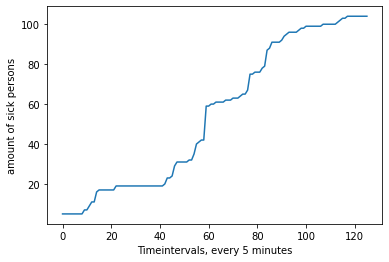

In [127]:
#plots of sickness over time intervals
import matplotlib.pyplot as plt
plt.plot(lstwsd)
plt.xlabel('Timeintervals, every 5 minutes')

plt.ylabel('amount of sick persons')

Text(0, 0.5, 'amount of sick persons')

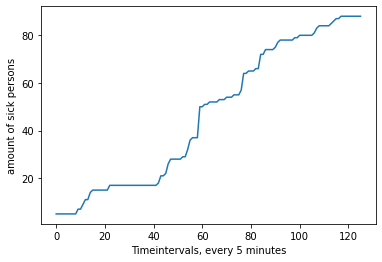

In [128]:
plt.plot(lstwsd_2)
plt.xlabel('Timeintervals, every 5 minutes')

plt.ylabel('amount of sick persons')

This shows that while the vaccinations were implemented at a later time, it still is worth to wait a bit to vaccinate to see who are the most popular persons. Since this will decrease the total amount of sick persons. Below is the final degree (final amount of connections) each node had over the span of this experiment.

Text(0, 0.5, 'The degree')

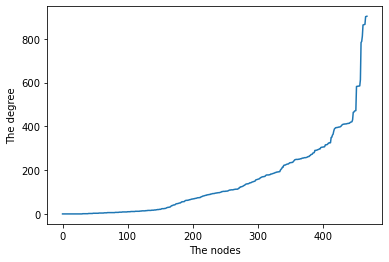

In [129]:
deg_list = []
for key in dictio.keys():
    deg_list.append(dictio[key][1])
    
#the degree distribution of the nodes sorted (Without the connections of vaccinated individuals. because they do not matter)
#i.e. amount of contacts, thus two people can have a connection at two different time intervals which would count for 2 contacts 
#and thus 2 degree more for each individual.
plt.plot(sorted(deg_list))
plt.xlabel('The nodes')

plt.ylabel('The degree')